In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import gmaps
from citipy import citipy
from config import gkey
gmaps.configure(api_key=gkey)

In [2]:
cadmium_df = pd.read_csv("Database/Cadmium/Cadmium.csv.csv")
cadmium_df.head()

,STATE_ABBR,AMA_SITE_CODE,AQS_POC,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,AQS_PARAMETER_CODE,AQS_PARAMETER_NAME,...,AQS_QUALIFIER_10,AQS_METHOD_CODE,SAMPLE_COLLECTION_DESC,SAMPLE_ANALYSIS_DESC,SAMPLE_VALUE_FLAG,BELOW_MDL_FLAG,CENSUS_TRACT_ID,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,NaN,Y,34023006206,1841,40.472825,-74.422403
1,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,ND,NaN,34023006206,1841,40.472825,-74.422403
2,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,ND,NaN,34023006206,1841,40.472825,-74.422403
3,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,ND,NaN,34023006206,1841,40.472825,-74.422403
4,NJ,340230006,5,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,88110,Cadmium (PM2.5),...,NaN,811,Met One SASS Teflon,Energy dispersive XRF,ND,NaN,34023006206,1841,40.472825,-74.422403


In [3]:
cadmium_clean= cadmium_df.filter(items=['PROGRAM', 'YEAR', 'QUARTER',
       'SAMPLE_DATE', 'SAMPLE_START_TIME', 'DURATION_DESC',
       'SAMPLE_VALUE_REPORTED', 'AQS_UNIT_CODE', 'UNIT_DESC',
       'SAMPLING_FREQUENCY_CODE', 'SAMPLE_VALUE_STD_FINAL_UG_M3',
       'SAMPLE_VALUE_STD_FINAL_TYPE', 'MDL_STD_UG_M3',
       'CENSUS_TRACT_POPULATION_2010', 'MONITOR_LATITUDE', 'MONITOR_LONGITUDE'])
cadmium_clean.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403


In [4]:
cadmium_clean['PROGRAM'].value_counts()

PM2.5 SPECIATION NETWORK      6935
CSN SUPPLEMENTAL               320
SLAMS                           40
COMMUNITY-SCALE MONITORING      17
Name: PROGRAM, dtype: int64

In [5]:
cadmium_clean['DURATION_DESC'].value_counts()

24 HOURS    7308
12 HOUR        4
Name: DURATION_DESC, dtype: int64

In [6]:
cadmium_clean['MONITOR_LATITUDE'].value_counts()

40.472825    2434
40.641440    1587
40.787628    1498
39.923042     712
40.720989     704
39.934446     320
40.462182      40
40.816809      16
40.833111       1
Name: MONITOR_LATITUDE, dtype: int64

In [7]:
year_group=cadmium_clean.groupby(by='YEAR')

In [8]:
year_group['SAMPLE_VALUE_REPORTED'].mean()

YEAR
2001    0.001724
2002    0.002405
2003    0.002354
2004    0.002504
2005    0.002126
2006    0.001747
2007    0.000572
2008    0.010846
2009    0.002151
2010    0.002548
2011    0.002720
2012    0.001478
2013    0.001702
2014    0.001791
2015    0.002014
2016    0.001284
Name: SAMPLE_VALUE_REPORTED, dtype: float64

In [9]:
year_group['SAMPLE_VALUE_REPORTED'].max()

YEAR
2001    0.01220
2002    0.02610
2003    0.03190
2004    0.03190
2005    0.02170
2006    0.02540
2007    0.01860
2008    2.35000
2009    0.02330
2010    0.02490
2011    0.03140
2012    0.02560
2013    0.02440
2014    0.03040
2015    0.02790
2016    0.02719
Name: SAMPLE_VALUE_REPORTED, dtype: float64

In [10]:
cadmium_24hours= cadmium_clean[cadmium_clean['DURATION_DESC'] == '24 HOURS']
cadmium_24hours.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403


In [11]:
cadmium_years_24hours=cadmium_24hours.groupby(by='YEAR')

In [12]:
cadmium_years_24hours.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,PM2.5 SPECIATION NETWORK,2014,2,16-Jun-14,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403
1625,PM2.5 SPECIATION NETWORK,2013,1,01-Jan-13,00:00,24 HOURS,0.01050,105,UG/CU METER (LC),3,0.01050,L,0.010,1841,40.472825,-74.422403
1713,PM2.5 SPECIATION NETWORK,2013,2,09-Jun-13,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403
1714,PM2.5 SPECIATION NETWORK,2013,2,22-Apr-13,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403


In [13]:
#Get Mean Values of the Sample Value per year
mean_values=cadmium_years_24hours['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean()
new_df=pd.DataFrame(mean_values)
new_df=new_df.rename(columns={'SAMPLE_VALUE_STD_FINAL_UG_M3':'FINAL VALUE MEAN UG M3'})


In [14]:
#Years at Risk with mean value higher than EPA at risk level of getting cancer
njyears_at_risk= new_df[new_df['FINAL VALUE MEAN UG M3']>0.0018]
njyears_at_risk.head()

,FINAL VALUE MEAN UG M3
YEAR,
2002,0.002405
2003,0.002354
2004,0.002504
2005,0.002126
2009,0.002151


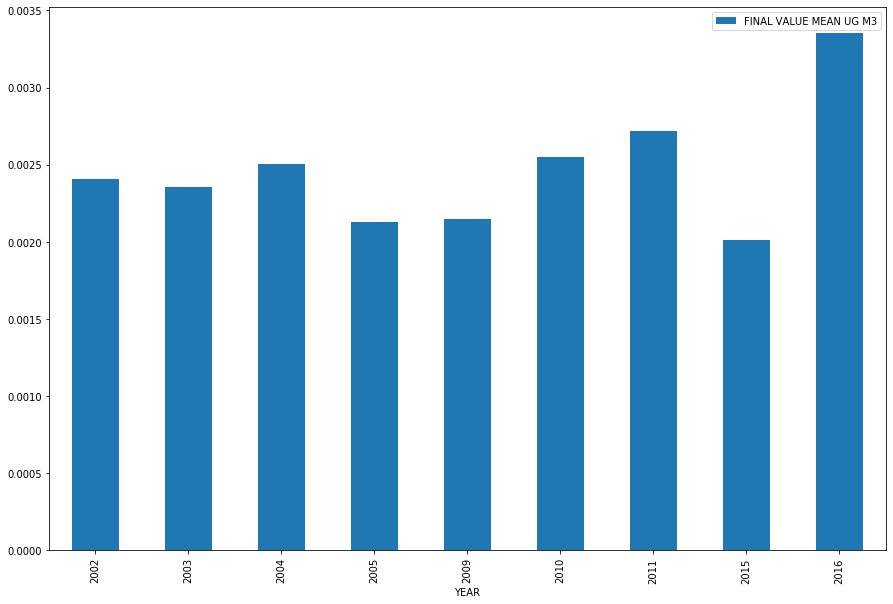

In [15]:
njyears_at_risk.plot(kind='bar', figsize=(15,10))

In [16]:

coordinates = []
    
for index, row in cadmium_clean.iterrows(): 
    if (row['MONITOR_LATITUDE'], row['MONITOR_LONGITUDE']) not in coordinates:
        coordinates.append((row['MONITOR_LATITUDE'],row['MONITOR_LONGITUDE']))
coordinates

[(40.472825, -74.422403),
 (40.816809, -74.043673),
 (39.923041999999995, -75.097617),
 (39.934446, -75.125291),
 (40.833110999999995, -74.043459),
 (40.720989, -74.192892),
 (40.64144, -74.208365),
 (40.787628000000005, -74.676301),
 (40.462182, -74.429439)]

In [31]:
cities = []
for coordinate_pair in coordinates:
    lat, lon = coordinate_pair
    cities.append(citipy.nearest_city(lat, lon))
# cities
city_names = []
for city in cities:
    city_names.append(city.city_name)
city_names

['highland park',
 'secaucus',
 'camden',
 'camden',
 'little ferry',
 'newark',
 'elizabeth',
 'hopatcong',
 'new brunswick']

In [33]:
city_data = pd.DataFrame({'Coordinates':coordinates,'City Name': city_names})
city_data

,Coordinates,City Name
0,"(40.472825, -74.422403)",highland park
1,"(40.816809, -74.043673)",secaucus
2,"(39.923041999999995, -75.097617)",camden
3,"(39.934446, -75.125291)",camden
4,"(40.833110999999995, -74.043459)",little ferry
5,"(40.720989, -74.192892)",newark
6,"(40.64144, -74.208365)",elizabeth
7,"(40.787628000000005, -74.676301)",hopatcong
8,"(40.462182, -74.429439)",new brunswick


In [34]:
figure_layout = {
    'width': '800px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
fig = gmaps.figure(layout=figure_layout)

In [35]:

# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)
# Add the layer to the map
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [52]:
locations = coordinates
weights = njyears_at_risk['FINAL VALUE MEAN UG M3']
fig = gmaps.figure(layout=figure_layout, center=(40.720989, -74.192892), zoom_level=9)
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights))
fig

Figure(layout=FigureLayout(border='1px solid black', height='300px', margin='0 auto 0 auto', padding='1px', wi…

In [40]:

city_index = []
for index, row in cadmium_clean.iterrows():
    for cindex, crow in city_data.iterrows():
        if crow['Coordinates'][1] == row['MONITOR_LONGITUDE']:
            city_index.append(crow['City Name'])
            continue
            
cadmium_clean['City'] = city_index            
cadmium_clean.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,City
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403,highland park
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403,highland park
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403,highland park


In [41]:
cadmium_24hours= cadmium_clean[cadmium_clean['DURATION_DESC'] == '24 HOURS']
cadmium_24hours=cadmium_24hours.dropna()

In [42]:
city_group = cadmium_24hours.groupby(by=['YEAR','City'])
city_group.head()

,PROGRAM,YEAR,QUARTER,SAMPLE_DATE,SAMPLE_START_TIME,DURATION_DESC,SAMPLE_VALUE_REPORTED,AQS_UNIT_CODE,UNIT_DESC,SAMPLING_FREQUENCY_CODE,SAMPLE_VALUE_STD_FINAL_UG_M3,SAMPLE_VALUE_STD_FINAL_TYPE,MDL_STD_UG_M3,CENSUS_TRACT_POPULATION_2010,MONITOR_LATITUDE,MONITOR_LONGITUDE,City
0,PM2.5 SPECIATION NETWORK,2007,4,21-Oct-07,00:00,24 HOURS,0.00175,105,UG/CU METER (LC),3,0.00175,L,0.010,1841,40.472825,-74.422403,highland park
1,PM2.5 SPECIATION NETWORK,2007,3,03-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.017,1841,40.472825,-74.422403,highland park
2,PM2.5 SPECIATION NETWORK,2007,3,06-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
3,PM2.5 SPECIATION NETWORK,2007,3,09-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1841,40.472825,-74.422403,highland park
4,PM2.5 SPECIATION NETWORK,2007,3,12-Sep-07,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1841,40.472825,-74.422403,highland park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7083,PM2.5 SPECIATION NETWORK,2008,3,19-Aug-08,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.010,1649,40.787628,-74.676301,hopatcong
7084,PM2.5 SPECIATION NETWORK,2008,3,05-Jul-08,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1649,40.787628,-74.676301,hopatcong
7085,PM2.5 SPECIATION NETWORK,2008,3,08-Jul-08,00:00,24 HOURS,0.00000,105,UG/CU METER (LC),3,0.00000,L,0.019,1649,40.787628,-74.676301,hopatcong
7086,PM2.5 SPECIATION NETWORK,2008,3,14-Jul-08,00:00,24 HOURS,0.00467,105,UG/CU METER (LC),3,0.00467,L,0.010,1649,40.787628,-74.676301,hopatcong


In [43]:
#Get mean values of the Cities at Risk during the time evaluated
city_df = pd.DataFrame(city_group['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean())
city_df

SAMPLE_VALUE_STD_FINAL_UG_M3
YEAR City                                       
2001 camden                             0.002403
     elizabeth                          0.001725
     highland park                      0.001341
     hopatcong                          0.002016
2002 camden                             0.002494
...                                          ...
2016 elizabeth                          0.003252
     highland park                      0.004366
     hopatcong                          0.003459
     new brunswick                      0.002672
     newark                             0.003538

[69 rows x 1 columns]

In [45]:
#Get cities with Risk of getting cancer by Cadmium EPA at Risk levels by mean levels of the data duing the time evaluated
cadmiumcities_at_risk= city_df[city_df['SAMPLE_VALUE_STD_FINAL_UG_M3'] > 0.0018]
cadmiumcities_at_risk=cadmiumcities_at_risk.rename(columns={'SAMPLE_VALUE_STD_FINAL_UG_M3':'FINAL VALUE MEAN UG M3'})
cadmiumcities_at_risk.head()

FINAL VALUE MEAN UG M3
YEAR City                             
2001 camden                   0.002403
     hopatcong                0.002016
2002 camden                   0.002494
     elizabeth                0.002805
     hopatcong                0.003017

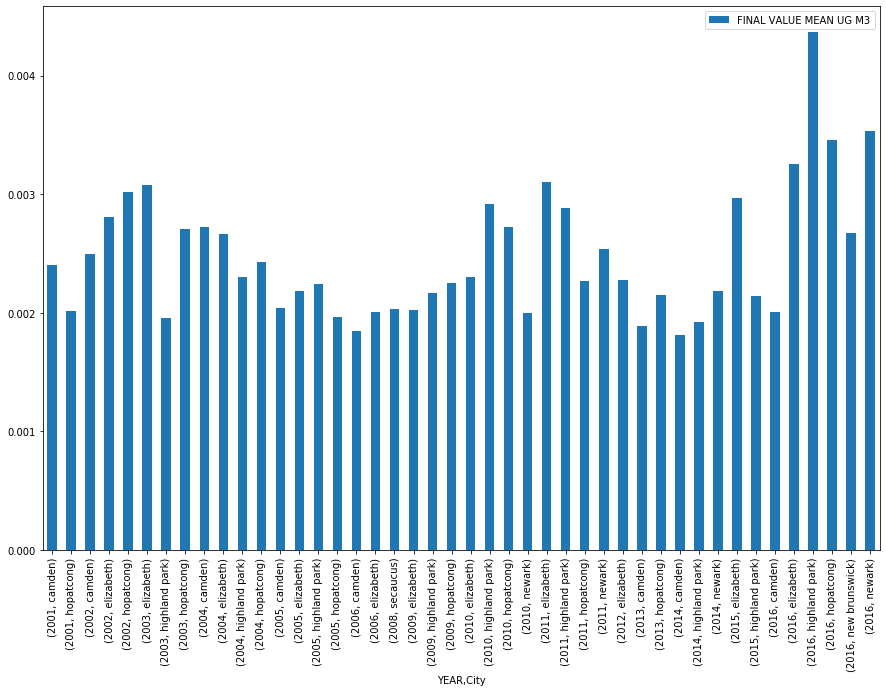

In [46]:
cadmiumcities_at_risk.plot(kind='bar', figsize=(15,10))


In [47]:
#Out of the City with Highest Risk Show change of Mean over the time evaluated
city_at_higher_risk=cadmium_24hours[cadmium_24hours['City'] == 'highland park']
city_at_higher_risk_year=city_at_higher_risk.groupby(by='YEAR')
city_at_higher_risk_df = pd.DataFrame(city_at_higher_risk_year['SAMPLE_VALUE_STD_FINAL_UG_M3'].mean())
city_at_higher_risk_df=city_at_higher_risk_df.rename(columns={'SAMPLE_VALUE_STD_FINAL_UG_M3':'FINAL VALUE MEAN UG M3'})
city_at_higher_risk_df
# city_at_higher_risk

,FINAL VALUE MEAN UG M3
YEAR,
2001,0.001341
2002,0.001767
2003,0.001957
2004,0.002300
2005,0.002248
2006,0.001617
2007,0.000629
2008,0.000878
2009,0.002165


In [48]:
Final_value_mean=city_at_higher_risk_df['FINAL VALUE MEAN UG M3'].values
Final_value_mean

array([0.00134137, 0.00176671, 0.00195727, 0.00229973, 0.00224786,
       0.00161702, 0.0006287 , 0.00087795, 0.00216494, 0.00292157,
       0.00288884, 0.00162296, 0.00140616, 0.00192406, 0.00214506,
       0.00436608])

In [49]:

year_list = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
            '2012', '2013', '2014', '2015', '2016']

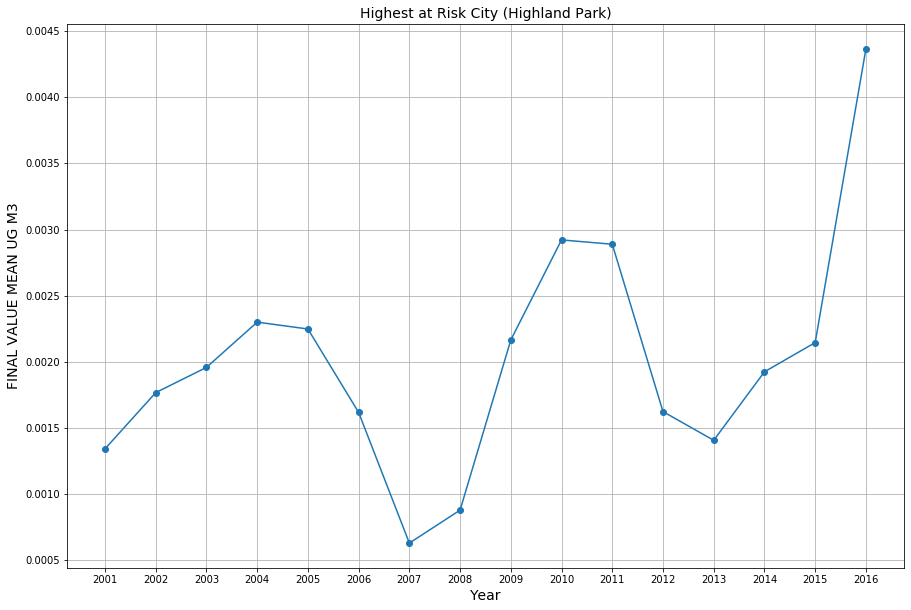

In [50]:
#Show change of mean Value of City with highest risk level over the time evaluated
plt.figure(figsize=(15,10))
plt.plot(year_list, Final_value_mean, marker='o')
plt.title('Highest at Risk City (Highland Park)', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('FINAL VALUE MEAN UG M3', fontsize=14)
plt.grid(True)
plt.show()
